Librerias

In [144]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
def invalid_input_matrix(message):
    """
    Function to raise an exception for errors in the input matrix.
    """
    raise Exception(message)

# Ejercicio 1

## Inciso a

In [146]:
def forward_substitution(L, b): #Lx=b
  """
  Resuelve el sistema Lx = b usando sustitución hacia adelante.
  Parámetros:
  L : numpy array de tamaño (n, n)
        Matriz triangular inferior.
  b : numpy array de tamaño (n)
        Vector del lado derecho de la ecuación.

  Retorna:
  x : numpy array de tamaño (n,)
        Solución del sistema Lx = b.

  """
  m, n = np.shape(L)
  if m != n:
    raise invalid_input_matrix("La matriz L no es cuadrada")
  n = np.size(b)
  if n != m:
    raise invalid_input_matrix("El vector b no tiene el mismo número de elementos que la matriz L")
  x = np.zeros((n, 1))
  x[0,0] = b[0,0]/L[0,0]
  # Proceso de sustitución hacia adelante
  for i in range(1,n):
    x[i,0] = (b[i,0] - L[i,0:i]@x[0:i,0]) / L[i, i]
  return x

In [147]:
L = np.array([[2., 0., 0., 0.],
                      [1., 5., 0., 0.],
                      [4., 5., 2., 0.],
                      [2., 4., 4., 1.]])
b = np.array([[9., 10., 5., 6.]]).T
forward_substitution(L, b)

array([[ 4.5 ],
       [ 1.1 ],
       [-9.25],
       [29.6 ]])

## Inciso b

In [148]:
def backward_substitution(U, b): #Ux = b
    """
    Resuelve el sistema Ux = b usando sustitución hacia atrás.

    Parámetros:
    U : numpy array de tamaño (n, n)
        Matriz triangular superior.
    b : numpy array de tamaño (n,)
        Vector del lado derecho de la ecuación.

    Retorna:
    x : numpy array de tamaño (n,)
        Solución del sistema Ux = b.
    """
    m, n = np.shape(U)
    if m != n:
        raise invalid_input_matrix("La matriz U no es cuadrada")
    n = np.size(b)
    if n != m:
        raise invalid_input_matrix("El vector b no tiene el mismo número de elementos que la matriz U")

    x = np.zeros((n,1))
    x[n-1,0] = b[n-1,0] / U[n-1,n-1]

    # Proceso de sustitución hacia atrás
    for i in range(n-2, -1, -1):
        x[i,0] = (b[i,0] - U[i, i+1:n]@ x[i+1:n,0]) / U[i, i]
    return x

## Inciso c

In [149]:
def int_rowa(A, i, j):
  """
  Intercambia las filas i y j de la matriz A.

  Parámetros:
  A : numpy array de tamaño (n, n)
        Matriz de entrada.
  i : int
        Índice de la primera fila a intercambiar.
  j : int
        Índice de la segunda fila a intercambiar.

  Retorna:
  A : numpy array de tamaño (n, n)
        Matriz con las filas i y j intercambiadas.
  """
  B = np.copy(A)
  A[i] = B[j]
  A[j] = B[i]
  return A

In [150]:
def index_max(v,j):
  """
  Encuentra el índice del elemento máximo en la columna j de la matriz v.

  Parámetros:
  v : numpy array de tamaño (n, n)
        Matriz de entrada.
  j : int
        Índice de la columna en la que se debe buscar el elemento máximo.

  Retorna:
  i
        Índice del elemento máximo en la columna j de la matriz v.
  """
  v = np.abs(v)
  index = np.argmax(v[j:])
  index += j
  return index

In [151]:
def fact_plu(A, ep = 1e-15):
    """
    Resuelve el sistema Ax = b utilizando la factorización PLU con permutación.

    Parámetros:
    A : numpy array de tamaño (n, n)
        Matriz cuadrada invertible.

    ep : float
        Tolerancia para la diagonal principal de la matriz A.

    Retorna:
    x : numpy array de tamaño (n,)
        Solución del sistema Ax = b.
    """
    m,n = np.shape(A)
    if m != n:
        raise invalid_input_matrix("La matriz A no es cuadrada")
    P = np.eye(n)
    L = np.zeros((n,n))
    U = np.copy(A)
    for j in range(n-1):
      index = index_max(U[:,j],j)
      if abs(U[index,j]) < 1e-10:
        raise invalid_input_matrix("La matriz A no es invertible")
      P = int_rowa(P,j,index)
      L = int_rowa(L,j,index)
      U = int_rowa(U,j,index)
      for i in range(j+1,n):
        L[i,j] = (U[i,j])/(U[j,j])
        U[i] = U[i] - L[i,j]*U[j]
    L = L + np.eye(n)
    return P, L, U

In [152]:
def solv_plu(A, b , ep = 1e-15):
  """
  Resuelve el sistema Ax = b utilizando la factorización PLU con permutación.

  Parámetros:
  A : numpy array de tamaño (n, n)
        Matriz cuadrada invertible.
  b : numpy array de tamaño (n,)
        Vector del lado derecho de la ecuación.

  Retorna:
  x : numpy array de tamaño
        Solución del sistema Ax = b.
  """
  m, n = np.shape(A)
  if m != n:
    raise invalid_input_matrix("La matriz A no es cuadrada")
  n = np.size(b)
  if n != m:
    raise invalid_input_matrix("El vector b no tiene el mismo número de elementos que la matriz A")
  P, L, U = fact_plu(A, ep)
  y = forward_substitution(L, P@b)
  x = backward_substitution(U, y)
  return x

## Inciso d

In [153]:
def cholesky_decomposition(A, ep = 1e-15):
    """
    Realiza la factorización de Cholesky de una matriz A simétrica y definida positiva.

    Parámetros:
    A : numpy array de tamaño (n, n)
        Matriz simétrica y definida positiva.

    Retorna:
    L : numpy array de tamaño (n, n)
        Matriz triangular inferior tal que A = L L^T.
    """

    if not np.allclose(A,A.T):
      raise invalid_input_matrix("La matriz no es simétrica")
    m, n = np.shape(A)
    if m != n:
      raise invalid_input_matrix("La matriz A no es cuadrada")
    L = np.zeros((n,n))
    # Factorización de Cholesky
    for j in range(n):
        for i in range(j,n):
            if i == j:
                root = A[i,j] - np.sum(L[i, :j]**2)
                if root <= 0:
                    raise invalid_input_matrix("La matriz no es definida positiva")
                root = np.sqrt(root)
                if root < ep:
                    raise invalid_input_matrix("La matriz no invertible")
                L[i,i] = root
            elif i>j:
                L[i, j] = (1/L[j,j])*(A[i,j] - np.sum(L[i, :j]*L[j, :j]))

    return L

def solve_cholesky(A, b):
    """
    Resuelve el sistema Ax = b utilizando la factorización de Cholesky.

    Parámetros:
    A : numpy array de tamaño (n, n)
        Matriz simétrica y definida positiva.
    b : numpy array de tamaño (n,)
        Vector del lado derecho de la ecuación.

    Retorna:
    x : numpy array de tamaño (n,)
        Solución del sistema Ax = b.
    """
    # Factorización de Cholesky A = L L^T
    L = cholesky_decomposition(A)

    # Resolver Ly = b (sustitución hacia adelante)
    y = forward_substitution(L, b)

    # Resolver L^T x = y (sustitución hacia atrás)
    x = backward_substitution(L.T, y)

    return x

## Inciso e

In [154]:
M = 10*np.random.rand(100,100)
A = M@M.T
x_sol = np.array([[i+1 for i in range(100)]], dtype=float).T
b = A@x_sol
# Mostrar el resultado
print("Vector b:", b)

Vector b: [[13115256.12941413]
 [12593981.05530863]
 [11819705.88827784]
 [11721573.23401517]
 [11889278.53318109]
 [13669376.103831  ]
 [12397586.37956085]
 [12401744.38132398]
 [12190663.18027053]
 [12136579.2377077 ]
 [12956607.78701072]
 [11662912.99467736]
 [13637636.14747873]
 [13189267.54904179]
 [12496900.20464753]
 [13795797.6870407 ]
 [12083644.73662249]
 [11788423.96773503]
 [12125879.83725946]
 [11973530.46573413]
 [12643991.95423236]
 [12091270.77843389]
 [14207309.72072932]
 [13411560.96066251]
 [13481371.36816656]
 [12177614.42693749]
 [12173869.96332467]
 [12901014.61435249]
 [12269502.77489267]
 [12687048.77878042]
 [11371037.02662129]
 [12160172.86957357]
 [12695466.17921601]
 [11033725.59733571]
 [12642777.13170449]
 [12516081.34889073]
 [12720196.19364148]
 [12102546.4664495 ]
 [12428299.58919415]
 [13943424.32039711]
 [14361787.55791644]
 [12396133.96601342]
 [13403563.67308116]
 [12119284.4478253 ]
 [13077171.44239748]
 [13224285.5064405 ]
 [12257934.54925206]
 [1

## Inciso f

In [155]:
x_sol.flatten()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

In [156]:
xplu = solv_plu(A,b)
xplu.flatten()

array([  1.        ,   2.        ,   3.        ,   4.        ,
         5.        ,   6.        ,   7.        ,   8.00000001,
         9.        ,  10.        ,  11.00000001,  12.        ,
        13.        ,  14.        ,  15.        ,  16.        ,
        17.        ,  18.        ,  19.        ,  20.        ,
        21.        ,  22.        ,  23.        ,  24.        ,
        25.        ,  26.        ,  27.        ,  28.        ,
        29.        ,  30.        ,  31.        ,  32.        ,
        32.99999999,  34.        ,  35.        ,  36.        ,
        37.        ,  38.        ,  39.        ,  40.        ,
        41.        ,  42.        ,  42.99999999,  44.        ,
        45.        ,  46.        ,  47.        ,  48.        ,
        48.99999999,  50.        ,  51.00000001,  52.        ,
        53.00000001,  54.        ,  54.99999999,  56.        ,
        57.        ,  58.        ,  59.        ,  60.        ,
        61.00000001,  61.99999999,  63.00000001,  64.  

In [157]:
xchol = solve_cholesky(A,b)
xchol.flatten()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

## Inciso g

In [158]:
def compute_errors(x_sol, x):
    # Error absoluto
    err_abs = np.linalg.norm(x_sol - x)

    # Error relativo
    err_rel = err_abs / np.linalg.norm(x_sol)

    return err_abs, err_rel


In [159]:
#PLU
print("Error absoluto y relativo (PLU):", compute_errors(xplu, x_sol))
print("Error absoluto y relativo (Cholesky):", compute_errors(xchol, x_sol))

Error absoluto y relativo (PLU): (3.52614522858282e-08, 6.062016370827716e-11)
Error absoluto y relativo (Cholesky): (2.55070446209654e-09, 4.3850752603618656e-12)


## Inciso h

In [160]:
abs_er_plu = np.zeros(30)
rel_er_plu = np.zeros(30)
abs_er_chol = np.zeros(30)
rel_er_chol = np.zeros(30)
for i in range(30):
  M = 10*np.random.rand(100,100)
  A = M@M.T
  b = A@x_sol
  xplu = solv_plu(A,b).flatten()
  xchol = solve_cholesky(A,b).flatten()
  abs_er_plu[i], rel_er_plu[i] = compute_errors(xplu, x_sol.flatten())
  abs_er_chol[i], rel_er_chol[i] = compute_errors(xchol, x_sol.flatten())

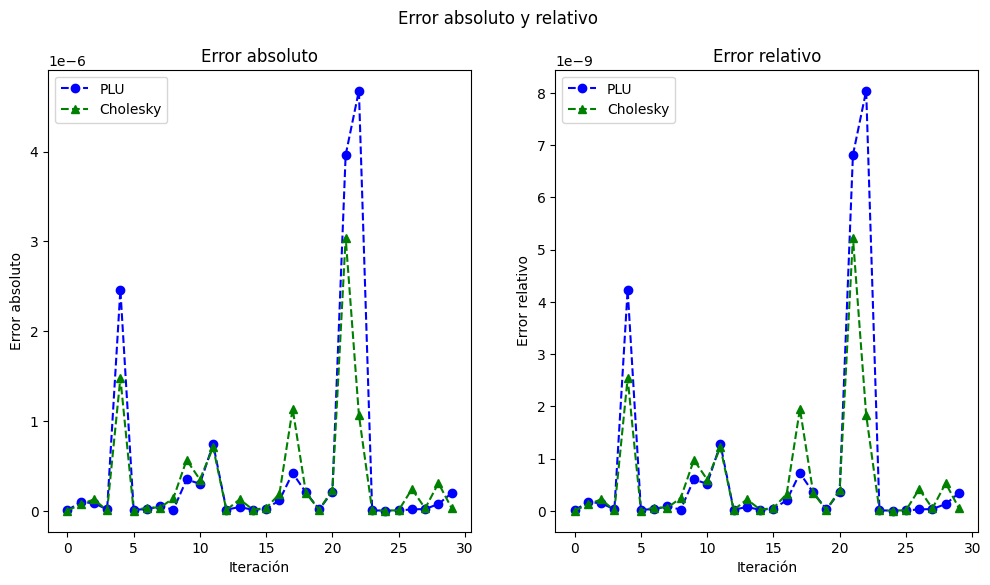

In [161]:
fig, axs = plt.subplots(1, 2, figsize=(12,6))
fig.suptitle("Error absoluto y relativo")
axs[0].plot(range(30), abs_er_plu, 'b--o', label='PLU')
axs[0].plot(range(30), abs_er_chol, 'g--^', label='Cholesky')
axs[0].set_title("Error absoluto")
axs[0].set_xlabel("Iteración")
axs[0].set_ylabel("Error absoluto")
axs[0].legend()
axs[1].plot(range(30), rel_er_plu, 'b--o', label='PLU')
axs[1].plot(range(30), rel_er_chol, 'g--^', label='Cholesky')
axs[1].set_title("Error relativo")
axs[1].set_xlabel("Iteración")
axs[1].set_ylabel("Error relativo")
axs[1].legend()
plt.show()

## Inciso i

In [162]:
print('Media PLU: ', rel_er_plu.mean())
print('Media Cholesky: ', rel_er_chol.mean())

Media PLU:  8.129564877584619e-10
Media Cholesky:  5.852900899743079e-10


¿Cuál de los dos errores crees que sea más adecuado utilizar para conocer el mejor funcionamiento de los algoritmos? Justifica tu respuesta

Podemos ver que el valor de X_sol es casi el mismo para todas las matrices y el error relativo y el error absolutos es un tipo de escalaminto el error relativo del absoluto, por lo que nos da la misma informacion

¿Cuál algoritmo es más preciso? y ¿cuál algoritmo es más exacto?

Aun que la diferencia es minima Cholesky tiene una mejor exactitud y mejor precision pues su media y desviacion estandar son menores a la de PLU

# Ejercicio 2

## Inciso a

In [163]:
from re import X
def solv_Jacobi(A, b, x0, ep, max_iter):
  """
  Resuelve el sistema Ax = b utilizando el método de Jacobi.
  Parámetros:
  A : numpy array de tamaño (n, n)
        Matriz cuadrada invertible.
  b : numpy array de tamaño (n,)
        Vector del lado derecho de la ecuación.
  x0 : numpy array de tamaño (n,)
        Vector inicial

  Retorna:
  x : numpy array de tamaño (n,)
        Solución del sistema Ax = b.
  """
  m, n = np.shape(A)
  if m != n:
    raise invalid_input_matrix("La matriz A no es cuadrada")
  n = np.size(b)
  if n != m:
    raise invalid_input_matrix("El vector b no tiene el mismo número de elementos que la matriz A")

  x = np.copy(x0)
  for k in range(max_iter):
    x = np.concatenate((x,np.zeros((n,1))), axis=1)
    for i in range(n):
      sumx = 0
      for j in range(n):
        if i != j:
           sumx += A[i,j]*x[j,k]
      x[i,k+1] = 1/A[i,i]*(b[i,0] - sumx)
    errorv = np.linalg.norm(x[:,k+1] - x[:,k])
    if errorv < ep:
      return x[:,k+1][:,None], k
  return x[:,max_iter][:,None], max_iter

## Inciso b

In [164]:
def solv_Gauss_Seidel(A, b, x0, ep, max_iter):
  """
  Resuelve el sistema Ax = b utilizando el método de Gauss-Seidel.
  Parámetros:
  A : numpy array de tamaño (n, n)
        Matriz cuadrada invertible.
  b : numpy array de tamaño (n,)
        Vector del lado derecho de la ecuación.
  x0 : numpy array de tamaño (n,)
        Vector inicial
  Retorna:
  x : numpy array de tamaño (n,)
        Solución del sistema Ax = b.
  """
  m , n = np.shape(A)
  if m != n:
    raise invalid_input_matrix("La matriz A no es cuadrada")
  n = np.size(b)
  if n != m:
    raise invalid_input_matrix("El vector b no tiene el mismo número de elementos que la matriz A")
  x = np.copy(x0)
  for k in range(max_iter):
    x = np.concatenate((x,np.zeros((n,1))), axis=1)
    for i in range(n):
      sum1 = 0
      sum2 = 0
      for j in range(i):
        sum1 += A[i,j]*x[j,k+1]
      for j in range(i+1,n):
        sum2 += A[i,j]*x[j,k]
      x[i,k+1] = 1/A[i,i]*(b[i,0] - sum1 - sum2)
    errorv = np.linalg.norm(x[:,k+1] - x[:,k])
    if errorv < ep:
      return x[:,k+1][:,None], k
  return x[:,max_iter][:,None], max_iter

In [165]:
def mat_jacobi(n: int) -> np.ndarray:
    """ Crea una matriz de nxn con diagonal dominante """
    A = np.random.rand(n, n)
    for i in range(n):
        A[i, i] += n
    return A

## Inciso c

In [166]:
M = mat_jacobi(100)
b = M@x_sol

In [167]:
xjacob, _ = solv_Jacobi(M, b, np.zeros((100,1)), 1e-15, 100)
xjacob.flatten()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

In [168]:
xgs, _ = solv_Gauss_Seidel(M, b, np.zeros((100,1)), 1e-15, 100)
xgs.flatten()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

## Inciso g

In [169]:
abs_er_jacobi = np.zeros(30)
rel_er_jacobi = np.zeros(30)
abs_er_gs = np.zeros(30)
rel_er_gs = np.zeros(30)
it_jacobi = np.zeros(30)
it_gs = np.zeros(30)
for i in range(30):
  M = mat_jacobi(100)
  b = M@x_sol
  xjacob, k_jacobi = solv_Jacobi(M, b, np.zeros((100,1)), 1e-15, 100)
  xgs, k_gs = solv_Gauss_Seidel(M, b, np.zeros((100,1)), 1e-15, 100)
  abs_er_jacobi[i], rel_er_jacobi[i] = compute_errors(xjacob.flatten(), x_sol.flatten())
  abs_er_gs[i], rel_er_gs[i] = compute_errors(xgs.flatten(), x_sol.flatten())
  it_jacobi[i] = k_jacobi
  it_gs[i] = k_gs

## Inciso h

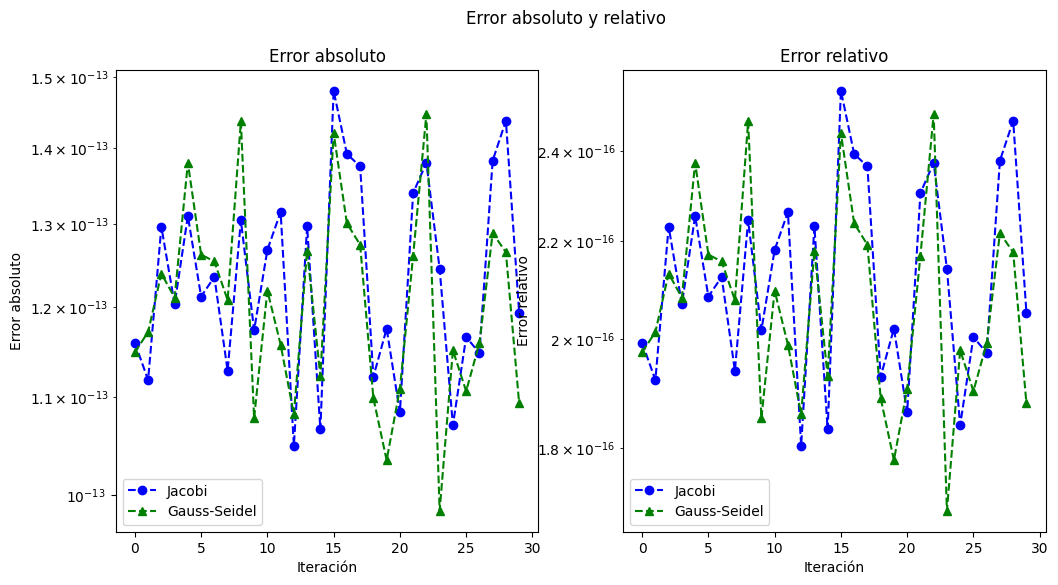

In [170]:
fig, axs = plt.subplots(1,2, figsize=(12,6))
fig.suptitle("Error absoluto y relativo")
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[0].plot(range(30), abs_er_jacobi, 'b--o', label='Jacobi')
axs[0].plot(range(30), abs_er_gs, 'g--^', label='Gauss-Seidel')
axs[0].set_title("Error absoluto")
axs[0].set_xlabel("Iteración")
axs[0].set_ylabel("Error absoluto")
axs[0].legend()
axs[1].plot(range(30), rel_er_jacobi, 'b--o', label='Jacobi')
axs[1].plot(range(30), rel_er_gs, 'g--^', label='Gauss-Seidel')
axs[1].set_title("Error relativo")
axs[1].set_xlabel("Iteración")
axs[1].set_ylabel("Error relativo")
axs[1].legend()
plt.show()

In [171]:
print('Media Jacobi: ', rel_er_jacobi.mean())
print('Media Gauss-Seidel: ', rel_er_gs.mean())

Media Jacobi:  2.1274759423867776e-16
Media Gauss-Seidel:  2.076019351554252e-16


In [172]:
print('Desviación Jacobi: ', rel_er_jacobi.std())
print('Desviación Gauss-Seidel: ', rel_er_gs.std())

Desviación Jacobi:  1.9967452833036025e-17
Desviación Gauss-Seidel:  1.980122419982615e-17


In [173]:
print('Media iteraciones Jacobi: ', it_jacobi.mean())
print('Media iteraciones Gauss-Seidel: ', it_gs.mean())

Media iteraciones Jacobi:  62.53333333333333
Media iteraciones Gauss-Seidel:  27.633333333333333


Notemos la exactitud y la precision son casi las mismas , por lo que usar cualquiera de las dos es casi indistingible pero ahi es donde vemos las iteciones para decidir cual usar y podemos ver Gauss es mejor pues hace mucho menos iteraciones, que pues a la hora de problemas que requieran mas poder computacional nos va convenir mas usar Gauss

# Ejercicio 3

### Inciso a

In [184]:
def fact_QR(A):
  """
  Resuelve el sistema Ax = b utilizando el método de QR.
  Parámetros:
  A : numpy array de tamaño (n, n)
        Matriz cuadrada invertible.

  Retorna:
  x : numpy array de tamaño (n,)
        Solución del sistema Ax = b.
  """
  m, n = A.shape
  if m != n:
    raise invalid_input_matrix("La matriz A no es cuadrada")
  Q = np.copy(A)
  R = np.zeros((n,n))
  for i in range(m):
    R[i,i] = np.linalg.norm(Q[:,i])
    if R[i,i] == 0:
      raise invalid_input_matrix("La matriz A no es invertible")
    Q[:,i] /= R[i,i]
    for j in range(i+1,n):
      R[i,j] = np.dot(Q[:,i],Q[:,j])
      Q[:,j] -= R[i,j]*Q[:,i]
  return Q, R

In [175]:
def solv_QR(A, b):
  """
  Resuelve el sistema Ax = b utilizando el método de QR.
  Parámetros:
  A : numpy array de tamaño (n, n)
        Matriz cuadrada invertible.
  b : numpy array de tamaño (n,)
        Vector del lado derecho de la ecuación.

  Retorna:
  x : numpy array de tamaño (n,)
        Solución del sistema Ax = b.
  """
  Q, R = fact_QR(A)
  y = np.dot(Q.T, b)
  x = backward_substitution(R, y)
  return x

### Inciso b

In [176]:
A = 10*np.random.rand(100,100)
b = A@x_sol

In [177]:
x_sol.flatten()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

In [178]:
xqr = solv_QR(A,b)
xqr.flatten()

array([  0.99999993,   2.00000003,   3.00000004,   4.00000001,
         4.99999994,   6.00000004,   7.00000017,   8.00000003,
         8.99999998,  10.00000004,  10.99999998,  11.99999995,
        13.00000001,  13.99999994,  14.99999997,  16.        ,
        17.00000004,  17.99999998,  19.00000001,  19.99999989,
        21.00000005,  21.99999995,  23.00000001,  24.00000008,
        25.        ,  26.00000003,  27.00000007,  27.99999997,
        29.00000003,  30.00000006,  31.00000004,  32.00000001,
        32.99999998,  33.99999991,  34.99999996,  36.00000004,
        36.99999995,  38.00000009,  38.99999994,  39.99999997,
        41.00000001,  41.99999994,  42.99999993,  44.00000001,
        44.99999995,  46.00000009,  46.99999996,  47.9999999 ,
        48.99999991,  50.00000003,  50.99999998,  51.99999993,
        53.        ,  53.99999997,  54.99999996,  55.99999999,
        56.99999996,  57.99999998,  59.        ,  60.00000009,
        61.0000001 ,  62.00000005,  63.00000004,  64.00

### Inciso d

In [179]:
abs_er_qr = np.zeros(30)
rl_er_qr = np.zeros(30)
for i in range(30):
  A = 10*np.random.rand(100,100)
  b = A@x_sol
  xqr = solv_QR(A,b).flatten()
  abs_er_qr[i], rl_er_qr[i] = compute_errors(xqr, x_sol.flatten())

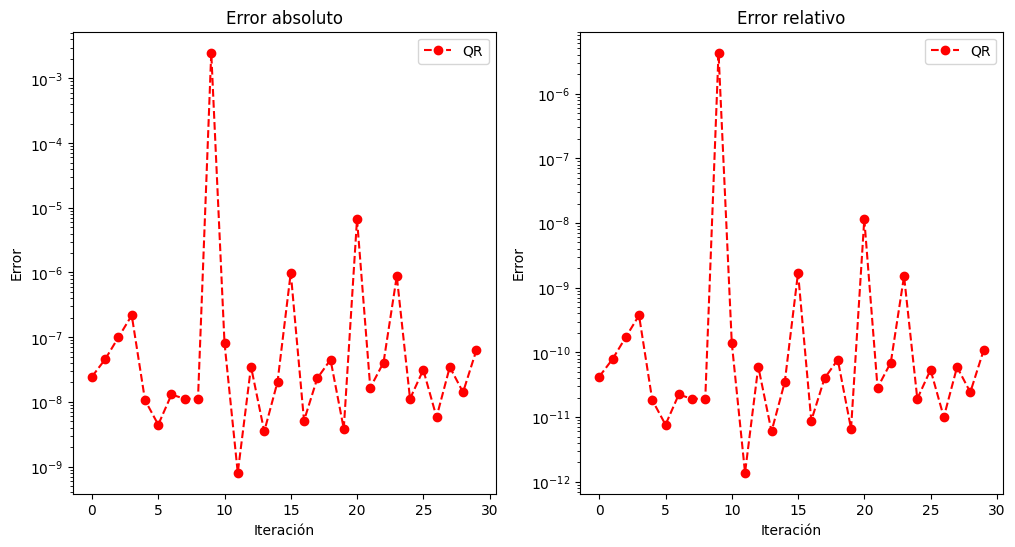

In [180]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[0].plot(range(30), abs_er_qr, 'r--o', label='QR')
axs[0].set_title("Error absoluto")
axs[0].set_xlabel("Iteración")
axs[0].set_ylabel("Error")
axs[0].legend()
axs[1].plot(range(30), rl_er_qr, 'r--o', label='QR')
axs[1].set_title("Error relativo")
axs[1].set_xlabel("Iteración")
axs[1].set_ylabel("Error")
axs[1].legend()
plt.show()

# Ejercicio 4

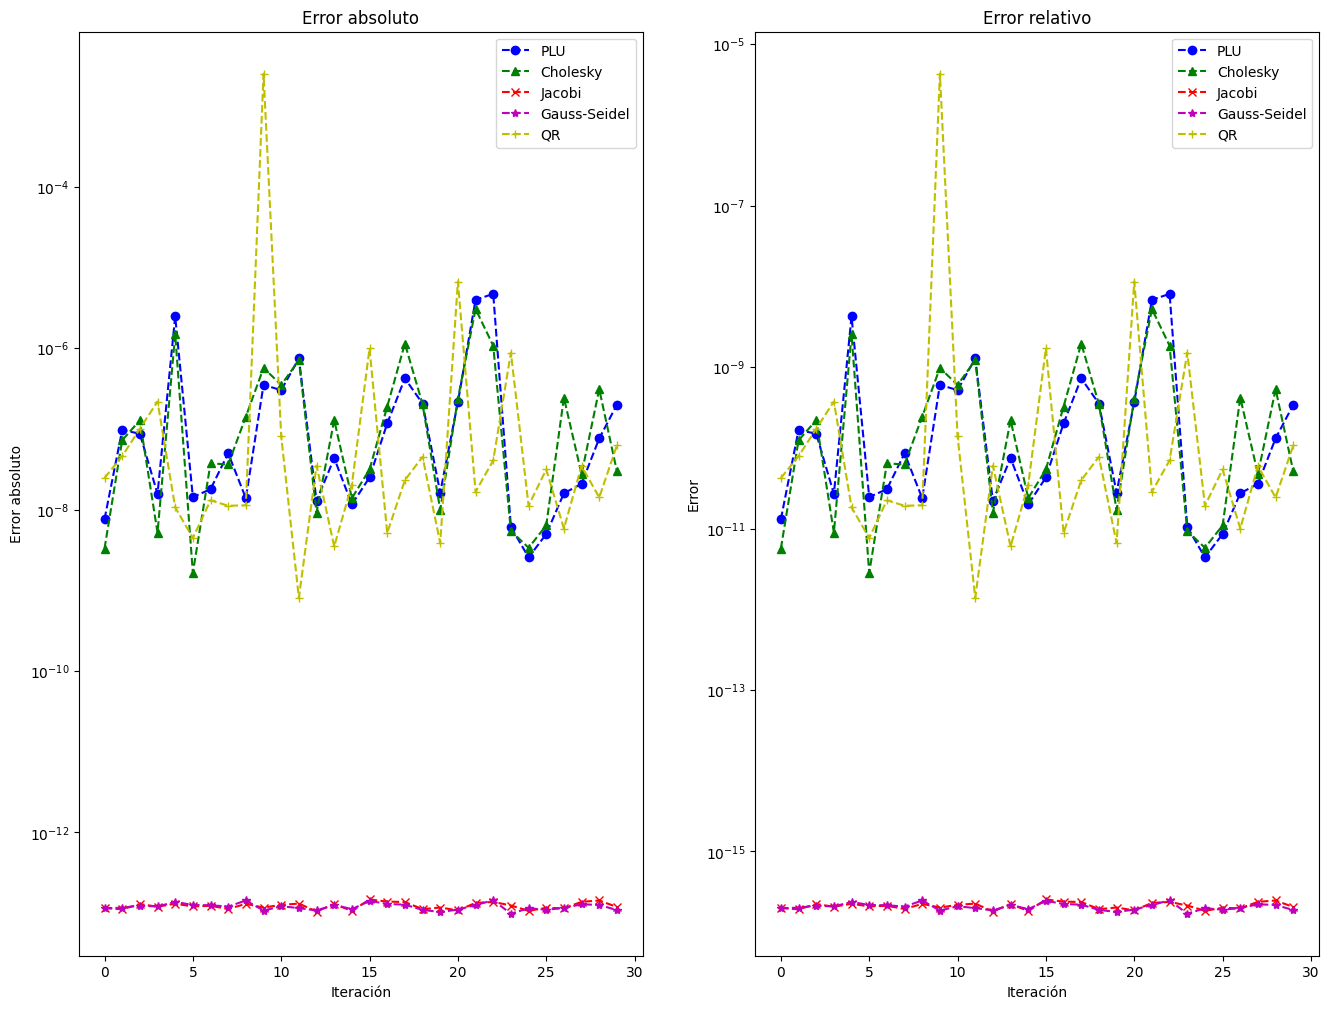

In [181]:
fig , axs = plt.subplots(1,2, figsize=(16,12))
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[0].plot(range(30), abs_er_plu, 'b--o', label='PLU')
axs[0].plot(range(30), abs_er_chol, 'g--^', label='Cholesky')
axs[0].plot(range(30), abs_er_jacobi, 'r--x', label='Jacobi')
axs[0].plot(range(30), abs_er_gs, 'm--*', label='Gauss-Seidel')
axs[0].plot(range(30), abs_er_qr, 'y--+', label='QR')
axs[0].set_title("Error absoluto")
axs[0].set_xlabel("Iteración")
axs[0].set_ylabel("Error absoluto")
axs[0].legend()
axs[1].plot(range(30), rel_er_plu, 'b--o', label='PLU')
axs[1].plot(range(30), rel_er_chol, 'g--^', label='Cholesky')
axs[1].plot(range(30), rel_er_jacobi, 'r--x', label='Jacobi')
axs[1].plot(range(30), rel_er_gs, 'm--*', label='Gauss-Seidel')
axs[1].plot(range(30), rl_er_qr, 'y--+', label='QR')
axs[1].set_title("Error relativo")
axs[1].set_xlabel("Iteración")
axs[1].set_ylabel("Error")
axs[1].legend()
plt.show()

¿Cual es el mas preciso

In [182]:
std = {'PLU': rel_er_plu.std(), 'Cholesky': rel_er_chol.std(), 'Jacobi': rel_er_jacobi.std(), 'Gauss-Seidel': rel_er_gs.std(), 'QR': rl_er_qr.std()}
std = dict(sorted(std.items(), key=lambda item: item[1]))
for key, value in std.items():
  print(f'{key:15} : {value}')

Gauss-Seidel    : 1.980122419982615e-17
Jacobi          : 1.9967452833036025e-17
Cholesky        : 1.073310026691563e-09
PLU             : 1.9360509814514236e-09
QR              : 7.706200085745764e-07


Por lo que Gauss-Seidel es el mas preciso

¿Cual es el mas exacto?

In [183]:
mean = {'PLU': rel_er_plu.mean(), 'Cholesky': rel_er_chol.mean(), 'Jacobi': rel_er_jacobi.mean(), 'Gauss-Seidel': rel_er_gs.mean(), 'QR': rl_er_qr.mean()}
mean = dict(sorted(mean.items(), key=lambda item: item[1]))
for key, value in mean.items():
  print(f'{key:15} : {value}')

Gauss-Seidel    : 2.076019351554252e-16
Jacobi          : 2.1274759423867776e-16
Cholesky        : 5.852900899743079e-10
PLU             : 8.129564877584619e-10
QR              : 1.4365771408491952e-07


Podemos ver que aqui igual el de Gauss es mejor aun que tambien el de Jacobi no existe mucha diferencia con el de Gauss

¿Cual método utilizarías para resolver la ecuación  Ax =b?

Gauss pues es la que cuenta con mejor exactitud y precision

¿Cuales son las ventajas de los otros algoritmos frente al solucionador que escogiste en el inciso anterior?



*   PLU: Es menos precisa pero la matriz que usa es inevertible lo cual nos conviene y ya que tenemos la factorizacion la podemos usar para otros sistemas similares.  
*   Cholesky: La usamos solo caundo el vector de terminos es independiente


*   Jacobi: Es un buen solucionador pero en algunos casos no converge , apesar de que ajustemos las condiciones y el numero de iteraciones
*   QR: Utiliza matrices mas bonitas en cuento a las restricciones , por lo que optamos por QR que es otra con mejor precision que la otra que es PLU



